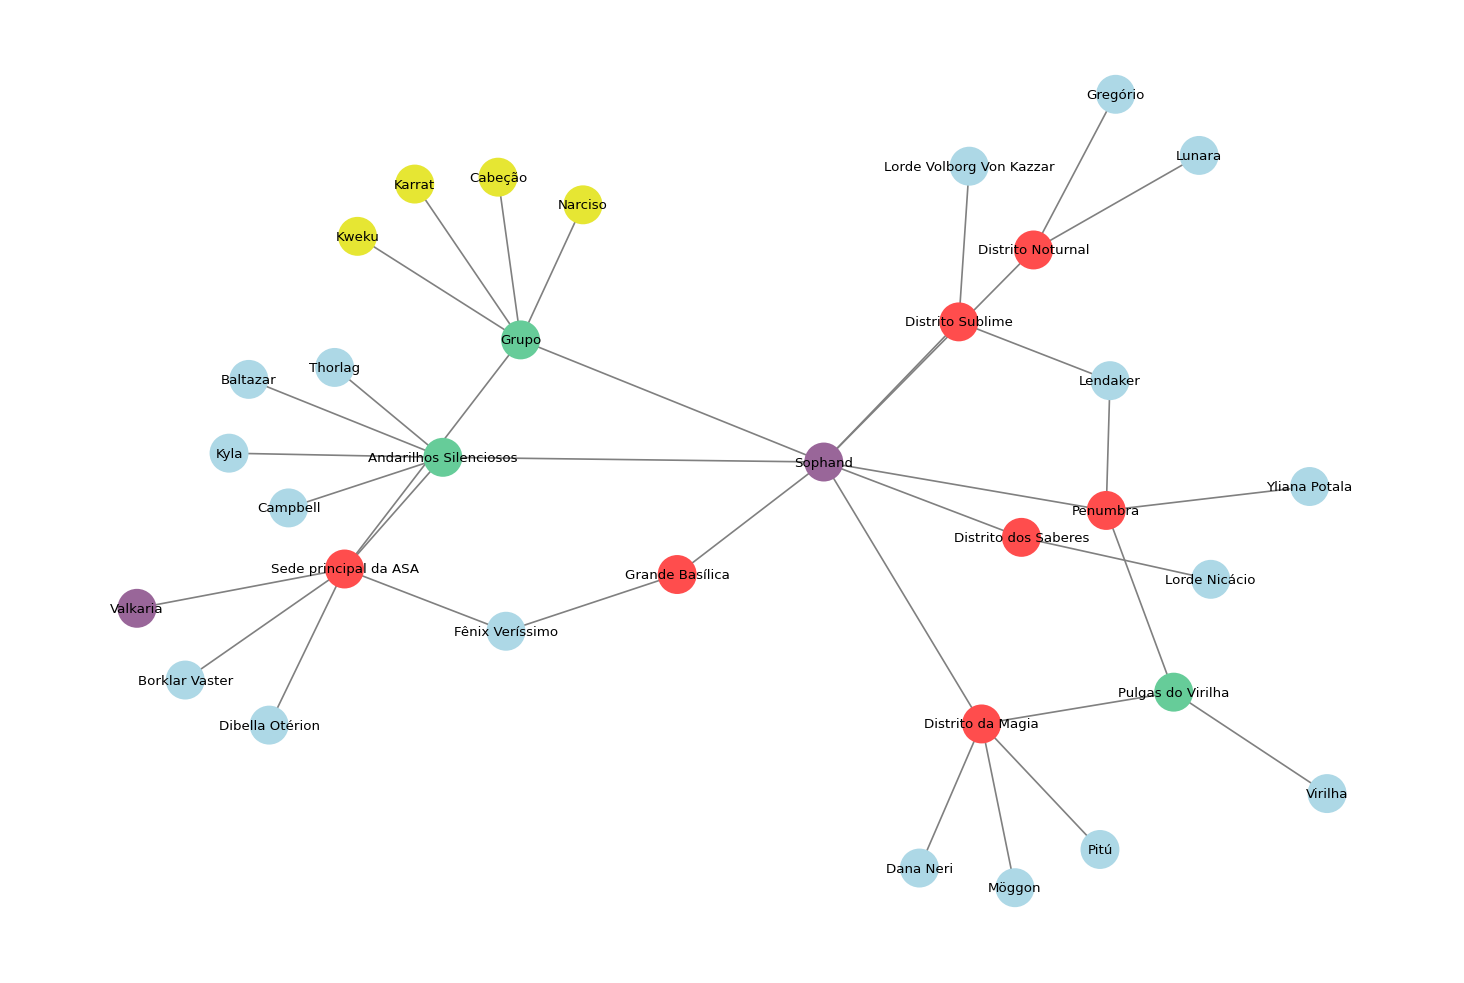

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

G = nx.Graph()

def add_nodes(nodes_list):
  G.add_nodes_from(nodes_list)

def add_edges(node, connection_list):
  for n in connection_list:
    G.add_edge(node, n)

# Grupo dos jogadores
# Player party
players = ["Kweku", "Cabeção", "Karrat", "Narciso"]
party = ["Grupo"]
add_nodes(players)
add_nodes(party)

G.add_edges_from([("Grupo", node) for node in players])

# Cidades
# Cities
citie_nodes = ["Sophand", "Valkaria"]

add_nodes(citie_nodes)


## Sophand
sophand_people = ["Pitú", "Möggon", "Lendaker", "Yliana Potala", "Lorde Volborg Von Kazzar", "Virilha", "Dana Neri", "Lorde Nicácio", "Lunara", "Gregório"]
sophand_landmark = ["Penumbra", "Distrito Sublime", "Grande Basílica", "Distrito da Magia", "Distrito dos Saberes", "Distrito Noturnal"]
sophand_groups = ["Pulgas do Virilha"]

sophand_nodes = sophand_people + sophand_landmark + sophand_groups
add_nodes(sophand_nodes)

sophand_central_node = "Sophand"
G.add_edges_from([(sophand_central_node, node) for node in sophand_landmark if node != sophand_central_node])

add_edges(sophand_central_node, party)
G.add_edge("Sophand", "Andarilhos Silenciosos")

### Sophand Connections
  # Landmark
connections_penumbra = ["Yliana Potala", "Lendaker", "Pulgas do Virilha"]
connections_distritoSublime = ["Lendaker", "Lorde Volborg Von Kazzar"]
connections_grandeBasilica = ["Fênix Veríssimo"]
connections_distritoSaberes = ["Lorde Nicácio"]
connections_distritoMagia = ["Möggon", "Dana Neri", "Pitú", "Pulgas do Virilha"]
connections_distritoNoturnal = ["Lunara", "Gregório"]

  # Group
connections_pulgasVirilha = ["Virilha"]

### Adding the connections to graph
  # Landmark
add_edges("Penumbra", connections_penumbra)
add_edges("Distrito Sublime", connections_distritoSublime)
add_edges("Grande Basílica", connections_grandeBasilica)
add_edges("Distrito dos Saberes", connections_distritoSaberes)
add_edges("Distrito da Magia", connections_distritoMagia)
add_edges("Distrito Noturnal", connections_distritoNoturnal)
  # Group
add_edges("Pulgas do Virilha", connections_pulgasVirilha)

## Valkaria
valkaria_people = ["Dibella Otérion", "Borklar Vaster", "Fênix Veríssimo", "Campbell", "Thorlag", "Kyla", "Baltazar"]
valkaria_landmark = ["Sede principal da ASA"]
valkaria_groups = ["Andarilhos Silenciosos"]

valkaria_nodes = valkaria_people + valkaria_landmark + valkaria_groups
add_nodes(valkaria_nodes)
group_andarilhos = ["Campbell", "Thorlag", "Kyla", "Baltazar"]

G.add_edge("Sede principal da ASA", "Andarilhos Silenciosos")
add_edges("Andarilhos Silenciosos", group_andarilhos)

valkaria_central_node = "Valkaria"
G.add_edges_from([(valkaria_central_node, node) for node in valkaria_landmark if node != valkaria_central_node])

## Valkaria Landmarks
connection_sedePrincipal = ["Dibella Otérion", "Borklar Vaster", "Fênix Veríssimo"]

add_edges("Sede principal da ASA", connection_sedePrincipal)
add_edges("Sede principal da ASA", party)

# Colorindo os nós
# Coloring the nodes
landmark_nodes = sophand_landmark + valkaria_landmark
group_nodes = party + valkaria_groups + sophand_groups

node_colors = []
for node in G.nodes():
    if node in landmark_nodes:
        node_colors.append((1, 0.3, 0.3, 1.0))
    elif node in citie_nodes:
        node_colors.append((0.6, 0.4, 0.6, 1.0))
    elif node in group_nodes:
        node_colors.append((0.4, 0.8, 0.6, 1.0))
    elif node in players:
        node_colors.append((0.9, 0.9, 0.2, 1.0))
    else:
        node_colors.append('lightblue')


# Desenhando o grafo
# Drawing the graph
plt.figure(figsize=(12, 8), dpi=120)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=8, node_shape='o')

# Mostrando o gráfico
# Showing the graph
plt.show()


# IDEIAS
# criar nós especiais para cidades e ligar a eles somente outros locais secundarios e organizações
# ligar as pessoas somente aos locais secundários e organizações